In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/prlmis-data-full.csv')

# EDA/Cleaning

In [7]:
df.head()

,YEAR,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISEVR,...,PRLANY,HEROINEVR,HEROINUSE,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,HALUCNG,TRTMENT,MHTRTMT
0,15,3,1,0,2,2,0,3,4,1,...,10,1,5,5,0,5,2,2,6,0
1,15,3,0,0,3,1,0,6,7,1,...,10,1,5,5,0,4,3,5,5,0
2,15,2,0,0,3,0,0,4,2,1,...,9,1,5,5,0,4,2,3,7,2
3,15,1,0,0,1,0,0,5,0,1,...,9,1,5,5,0,3,2,2,0,0
4,15,5,0,0,3,0,0,5,2,1,...,9,1,5,5,3,2,2,2,7,0


In [9]:
df.shape

(170317, 21)

In [11]:
df.isna().sum()

YEAR         0
AGECAT       0
SEX          0
MARRIED      0
EDUCAT       0
EMPLOY18     0
CTYMETRO     0
HEALTH       0
MENTHLTH     0
PRLMISEVR    0
PRLMISAB     0
PRLANY       0
HEROINEVR    0
HEROINUSE    0
TRQLZRS      0
SEDATVS      0
COCAINE      0
AMPHETMN     0
HALUCNG      0
TRTMENT      0
MHTRTMT      0
dtype: int64

In [26]:
df['MARRIED'].value_counts()

MARRIED
0    70799
1    52680
4    35130
2     9220
3     2488
Name: count, dtype: int64

In [29]:
df['EDUCAT'].value_counts()

EDUCAT
4    43227
1    41577
3    34357
5    33973
2    17183
Name: count, dtype: int64

In [31]:
df['CTYMETRO'].value_counts()

CTYMETRO
0    57146
3    50760
2    39716
1    22695
Name: count, dtype: int64

In [33]:
df['EMPLOY18'].value_counts()

EMPLOY18
0    83379
2    66589
1    20349
Name: count, dtype: int64

In [126]:
map_3 = {
    0: 3,
    1: 1,
    2: 2
}
df['EMPLOY18'] = df['EMPLOY18'].map(map_3)
df['EMPLOY18'].unique()

array([2, 1, 3])

# Bootstrapping

In [133]:
df['PRLMISEVR'].value_counts(normalize=True)

PRLMISEVR
0    0.892923
1    0.107077
Name: proportion, dtype: float64

In [129]:
bootstrap_add = df[df['PRLMISEVR'] == 1].sample(n=133000, replace=True, random_state=42)

bootstrap = pd.concat([df, bootstrap_add])
bootstrap['PRLMISEVR'].value_counts(normalize=True)

PRLMISEVR
0    0.50139
1    0.49861
Name: proportion, dtype: float64

In [144]:
cleaned_data = bootstrap.drop(columns=['MARRIED', 'EDUCAT', 'CTYMETRO'])

In [149]:
cleaned_data.to_csv('data/cleaned_data.csv', index=False)

# Understanding Correlations

In [155]:
cleaned_data.describe()

,YEAR,AGECAT,SEX,EMPLOY18,HEALTH,MENTHLTH,PRLMISEVR,PRLMISAB,PRLANY,HEROINEVR,HEROINUSE,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,HALUCNG,TRTMENT,MHTRTMT
count,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000,303317.000000
mean,15.988395,2.820752,0.510621,2.309491,2.444311,1.436514,0.498610,2.477045,0.860235,0.065104,0.111118,0.462879,0.090354,0.421440,0.349450,0.743888,0.177108,0.312393
std,0.817607,1.320112,0.499888,0.686220,1.070237,2.310622,0.499999,3.367695,1.075277,0.246709,0.518102,1.035448,0.435919,0.846883,0.768835,1.250712,0.944862,0.805383
min,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,4.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
max,17.000000,5.000000,1.000000,3.000000,7.000000,10.000000,1.000000,10.000000,10.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,8.000000


In [157]:
correlation = cleaned_data.corr()
correlation[correlation['PRLMISEVR']>=0.25].index.tolist()

['MENTHLTH',
 'PRLMISEVR',
 'PRLMISAB',
 'PRLANY',
 'TRQLZRS',
 'COCAINE',
 'AMPHETMN',
 'HALUCNG']

In [159]:
cleaned_data.groupby('HEROINUSE')['PRLMISEVR'].describe()

,count,mean,std,min,25%,50%,75%,max
HEROINUSE,,,,,,,,
0,283570.0,0.467814,0.498964,0.0,0.0,0.0,1.0,1.0
1,13357.0,0.923710,0.265471,0.0,1.0,1.0,1.0,1.0
2,2222.0,0.968047,0.175915,0.0,1.0,1.0,1.0,1.0
3,1576.0,0.967005,0.178680,0.0,1.0,1.0,1.0,1.0
4,1785.0,0.986555,0.115204,0.0,1.0,1.0,1.0,1.0
5,807.0,0.997522,0.049752,0.0,1.0,1.0,1.0,1.0


In [161]:
cleaned_data.groupby('COCAINE')['PRLMISEVR'].describe()

,count,mean,std,min,25%,50%,75%,max
COCAINE,,,,,,,,
0,226162.0,0.381620,0.485785,0.0,0.0,0.0,1.0,1.0
1,41159.0,0.797274,0.402035,0.0,1.0,1.0,1.0,1.0
2,26299.0,0.881745,0.322916,0.0,1.0,1.0,1.0,1.0
3,6171.0,0.907308,0.290023,0.0,1.0,1.0,1.0,1.0
4,2070.0,0.948309,0.221456,0.0,1.0,1.0,1.0,1.0
5,1456.0,0.936126,0.244612,0.0,1.0,1.0,1.0,1.0


In [163]:
cleaned_data.groupby('TRQLZRS')['PRLMISEVR'].describe()

,count,mean,std,min,25%,50%,75%,max
TRQLZRS,,,,,,,,
0,247358.0,0.429131,0.494953,0.0,0.0,0.0,1.0,1.0
1,7.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2,37102.0,0.759663,0.427294,0.0,1.0,1.0,1.0,1.0
3,11541.0,0.863443,0.343394,0.0,1.0,1.0,1.0,1.0
4,4980.0,0.934538,0.247364,0.0,1.0,1.0,1.0,1.0
5,2329.0,0.977673,0.147777,0.0,1.0,1.0,1.0,1.0


In [167]:
cleaned_data.groupby('AMPHETMN')['PRLMISEVR'].describe()

,count,mean,std,min,25%,50%,75%,max
AMPHETMN,,,,,,,,
0,237004.0,0.408166,0.491495,0.0,0.0,0.0,1.0,1.0
1,37669.0,0.766094,0.423319,0.0,1.0,1.0,1.0,1.0
2,21096.0,0.874573,0.331210,0.0,1.0,1.0,1.0,1.0
3,5021.0,0.944832,0.228331,0.0,1.0,1.0,1.0,1.0
4,1565.0,0.966773,0.179286,0.0,1.0,1.0,1.0,1.0
5,962.0,0.971933,0.165249,0.0,1.0,1.0,1.0,1.0


In [169]:
cleaned_data.groupby('SEDATVS')['PRLMISEVR'].describe()

,count,mean,std,min,25%,50%,75%,max
SEDATVS,,,,,,,,
0,290039.0,0.486266,0.499812,0.0,0.0,0.0,1.0,1.0
1,690.0,0.837681,0.369011,0.0,1.0,1.0,1.0,1.0
2,11627.0,0.752817,0.431393,0.0,1.0,1.0,1.0,1.0
3,489.0,0.914110,0.280488,0.0,1.0,1.0,1.0,1.0
4,365.0,0.871233,0.335402,0.0,1.0,1.0,1.0,1.0
5,107.0,0.981308,0.136071,0.0,1.0,1.0,1.0,1.0


In [196]:
cleaned_data.groupby('HALUCNG')['PRLMISEVR'].describe()

,count,mean,std,min,25%,50%,75%,max
HALUCNG,,,,,,,,
0,211394.0,0.353681,0.478113,0.0,0.0,0.0,1.0,1.0
1,12698.0,0.745472,0.435613,0.0,0.0,1.0,1.0,1.0
2,41357.0,0.793094,0.405092,0.0,1.0,1.0,1.0,1.0
3,24777.0,0.887840,0.315570,0.0,1.0,1.0,1.0,1.0
4,9564.0,0.927332,0.259605,0.0,1.0,1.0,1.0,1.0
5,3527.0,0.946413,0.225232,0.0,1.0,1.0,1.0,1.0


In [173]:
drug_use = ['COCAINE', 'HEROINUSE', 'TRQLZRS', 'AMPHETMN', 'SEDATVS', 'HALUCNG']
condition = (cleaned_data[drug_use] >= 1).all(axis=1)
cleaned_data['PRLMISEVR'].loc[condition].describe()

count    910.000000
mean       0.986813
std        0.114137
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: PRLMISEVR, dtype: float64

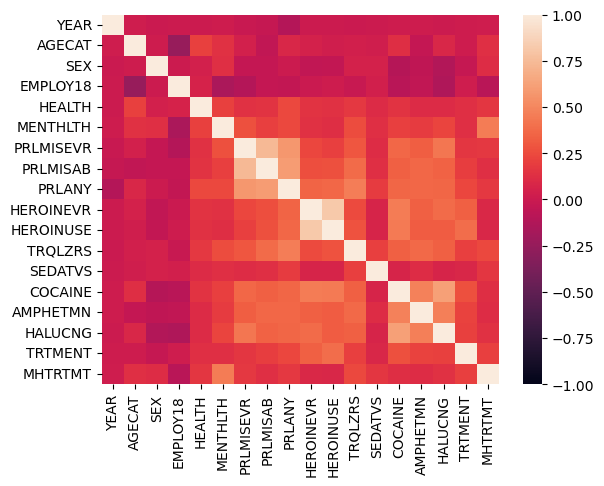

In [175]:
sns.heatmap(correlation, vmin=-1);

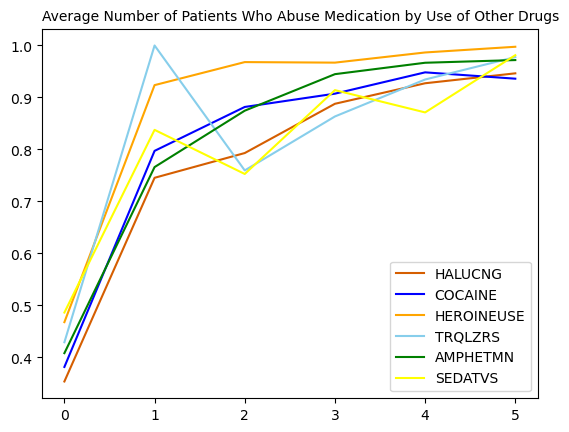

In [216]:
plt.plot(cleaned_data.groupby('HALUCNG')['PRLMISEVR'].mean(), label = 'HALUCNG', color = '#D55E00')
plt.plot(cleaned_data.groupby('COCAINE')['PRLMISEVR'].mean(), label='COCAINE', color = 'blue')
plt.plot(cleaned_data.groupby('HEROINUSE')['PRLMISEVR'].mean(), label='HEROINEUSE', color='orange')
plt.plot(cleaned_data.groupby('TRQLZRS')['PRLMISEVR'].mean(), label='TRQLZRS', color='skyblue')
plt.plot(cleaned_data.groupby('AMPHETMN')['PRLMISEVR'].mean(), label='AMPHETMN', color='green')
plt.plot(cleaned_data.groupby('SEDATVS')['PRLMISEVR'].mean(), label='SEDATVS', color='yellow')
plt.title('Average Number of Patients Who Abuse Medication by Use of Other Drugs', loc='left', size=10)
plt.legend();
plt.savefig('drug_use.png', dpi=192)